# 【問題1】コンペティション内容の把握
<br>
Home Creditはどのような企業？
<br>このコンペティションでは何を予測する？
<br>それを予測することで企業が得られるメリットは何？

<br>・電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測している。
<br>・借りてが安全に返済できる元本、満期、返済カレンダー
<br>・新たな貸し手を開拓することにより、返済利回りによる収益を確保でくる。

# 【問題2】データの概観の把握

データの概観を把握するために以下のようなことを行ってください。

<br>.head()、.info()、describe()などを使う
<br>欠損値の有無を見る
<br>クラスごとのデータ数をグラフに出す
<br>
<br>それぞれ結果に対する説明や考察も行ってください。

In [2]:
cd data

/Users/niikurasayaka/diveintocode-ml/Week3/data


In [3]:
cd home-credit-default-risk

/Users/niikurasayaka/diveintocode-ml/Week3/data/home-credit-default-risk


In [4]:
import pandas as pd
import numpy as np

In [5]:
train_df = pd.read_csv('application_train.csv')
test_df = pd.read_csv('application_test.csv')

In [6]:
train_df.shape

(307511, 122)

In [7]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 200)

## numerical data describe

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


## categorical data describe

In [9]:
train_df.describe(include='object').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


## 欠損データ数確認

In [10]:
train_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## Target割合

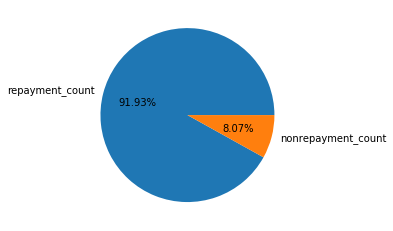

In [11]:
import numpy as np
import matplotlib.pyplot as plt

repayment_count = train_df['TARGET'] == 0
norepayment_count = train_df['TARGET'] == 1
label = ["repayment_count", "nonrepayment_count"]
gra_x = np.array([repayment_count.sum(), norepayment_count.sum()])
plt.pie(gra_x ,labels=label, autopct="%1.2f%%");

# 【問題3】課題設定

**課題・気づき・疑問**
　<br>・欠損データが多い。
　<br>・収入の最大と最少との差が大きい。
　<br>・返済可能な人が圧倒的に多い
 <br>・契約者の住居に関する状況に欠損が多い。
 <br>　⇨ただ家に関する情報は返済能力と相関がありそうなので収入等を組み合わせたあるカテゴリの平均値で埋める方がいいかもしれない。
 <br>・DAYS_EMPLOYEDのMAX値はバグデータ
 <br>・説明を読んでも何を示しているかよくわからない特徴量がある。
 <br>・categorical dataのunique数が全体的に限られていて区分分けしやすそう。
 <br>・
 <br>
 <br>
 <br>
 <br>
 
 **仮説**
 <br>・収入が多いほど返済能力は高い？
 <br>・年齢が若いほど返済能力は低い？
 <br>・学位歴が高いほど返済能力は高い？
 <br>・持ち家がある方が返済能力が高い？
 <br>・
 <br>
 <br>
 <br>
 

 # 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

**Tool**

In [12]:
# ある特徴量をn個にカテゴライズしそのカテゴリーそれぞれに対するターゲットの１の割合、個数、１の合計
def target_summary_split(split_feature, feature, target, n_split):
    train_df[feature] = pd.qcut(train_df[split_feature], 5)
    train_df_ = train_df[[feature, target]].groupby([feature], as_index=False).mean().sort_values(by=feature, ascending=True)
    cnt = train_df[[feature, target]].groupby([feature], as_index=False).count().sort_values(by=feature, ascending=True)
    total = train_df[[feature, target]].groupby([feature], as_index=False).sum().sort_values(by=feature, ascending=True)
    train_df_["TARGET cnt"] = cnt.iloc[:, 1]
    train_df_["TARGET total"] = total.iloc[:, 1]
    columns = [feature, "TARGET rate", "TARGET cnt", "TARGET total"]
    train_df_.columns = columns
    display(feature, train_df_)

In [13]:
# ある特徴量のそれぞれのカテゴリー対するターゲットの１の割合、個数、１の合計
def target_summary_nonsplit(feature, target):
    train_df_ = train_df[[feature, target]].groupby([feature], as_index=False).mean().sort_values(by=feature, ascending=True)
    cnt = train_df[[feature, target]].groupby([feature], as_index=False).count().sort_values(by=feature, ascending=True)
    total = train_df[[feature, target]].groupby([feature], as_index=False).sum().sort_values(by=feature, ascending=True)
    train_df_["TARGET cnt"] = cnt.iloc[:, 1]
    train_df_["TARGET total"] = total.iloc[:, 1]
    columns = [feature, "TARGET rate", "TARGET cnt", "TARGET total"]
    train_df_.columns = columns
    display(feature, train_df_)

## 特徴量把握

<br>NUMERICAL DATA

<br>個人情報
<br>SK_ID_CURR                           

<br>CNT_CHILDREN                         0
<br>AMT_INCOME_TOTAL                     0
<br>AMT_CREDIT                           0
<br>AMT_ANNUITY                         12
<br>AMT_GOODS_PRICE                    278
<br>REGION_POPULATION_RELATIVE           0
<br>DAYS_BIRTH                           0
<br>DAYS_EMPLOYED                        0
<br>DAYS_REGISTRATION                    0
<br>DAYS_ID_PUBLISH                      0
<br>
<br>所有物情報
<br>OWN_CAR_AGE                     202929
<br>FLAG_MOBIL                           0
<br>FLAG_EMP_PHONE                       0
<br>FLAG_WORK_PHONE                      0
<br>FLAG_CONT_MOBILE                     0
<br>FLAG_PHONE                           0
<br>FLAG_EMAIL                           0
<br>CNT_FAM_MEMBERS                      2
<br>
<br>住居の周辺情報
<br>REGION_RATING_CLIENT                 0
<br>REGION_RATING_CLIENT_W_CITY          0
<br>HOUR_APPR_PROCESS_START              0
<br>REG_REGION_NOT_LIVE_REGION           0
<br>REG_REGION_NOT_WORK_REGION           0
<br>LIVE_REGION_NOT_WORK_REGION          0
<br>REG_CITY_NOT_LIVE_CITY               0
<br>REG_CITY_NOT_WORK_CITY               0
<br>LIVE_CITY_NOT_WORK_CITY              0
<br>EXT_SOURCE_1                    173378
<br>EXT_SOURCE_2                       660
<br>EXT_SOURCE_3                     60965
<br>
<br>顧客が住んでいる建物情報（平均）
<br>APARTMENTS_AVG                  156061
<br>BASEMENTAREA_AVG                179943
<br>YEARS_BEGINEXPLUATATION_AVG     150007
<br>YEARS_BUILD_AVG                 204488
<br>COMMONAREA_AVG                  214865
<br>ELEVATORS_AVG                   163891
<br>ENTRANCES_AVG                   154828
<br>FLOORSMAX_AVG                   153020
<br>FLOORSMIN_AVG                   208642
<br>LANDAREA_AVG                    182590
<br>LIVINGAPARTMENTS_AVG            210199
<br>LIVINGAREA_AVG                  154350
<br>NONLIVINGAPARTMENTS_AVG         213514
<br>NONLIVINGAREA_AVG               169682
<br>
<br>顧客が住んでいる建物情報（モード）
<br>APARTMENTS_MODE                 156061
<br>BASEMENTAREA_MODE               179943
<br>YEARS_BEGINEXPLUATATION_MODE    150007
<br>YEARS_BUILD_MODE                204488
<br>COMMONAREA_MODE                 214865
<br>ELEVATORS_MODE                  163891
<br>ENTRANCES_MODE                  154828
<br>FLOORSMAX_MODE                  153020
<br>FLOORSMIN_MODE                  208642
<br>LANDAREA_MODE                   182590
<br>LIVINGAPARTMENTS_MODE           210199
<br>LIVINGAREA_MODE                 154350
<br>NONLIVINGAPARTMENTS_MODE        213514
<br>NONLIVINGAREA_MODE         169682
<br>
<br>顧客が住んでいる建物情報（中央値）
<br>APARTMENTS_MEDI                 156061
<br>BASEMENTAREA_MEDI               179943
<br>YEARS_BEGINEXPLUATATION_MEDI    150007
<br>YEARS_BUILD_MEDI                204488
<br>COMMONAREA_MEDI                 214865
<br>ELEVATORS_MEDI                  163891
<br>ENTRANCES_MEDI                  154828
<br>FLOORSMAX_MEDI                  153020
<br>FLOORSMIN_MEDI                  208642
<br>LANDAREA_MEDI                   182590
<br>LIVINGAPARTMENTS_MEDI           210199
<br>LIVINGAREA_MEDI                 154350
<br>NONLIVINGAPARTMENTS_MEDI        213514
<br>NONLIVINGAREA_MEDI              169682
<br>
<br>顧客が住んでいる建物情報（その他）
<br>TOTALAREA_MODE                  148431
<br>
<br>デフォルト回数
<br>OBS_30_CNT_SOCIAL_CIRCLE          1021
<br>DEF_30_CNT_SOCIAL_CIRCLE          1021
<br>OBS_60_CNT_SOCIAL_CIRCLE          1021
<br>DEF_60_CNT_SOCIAL_CIRCLE          1021
<br>
<br>電話番号の変更日
<br>DAYS_LAST_PHONE_CHANGE               1
<br>
<br>提出物
<br>FLAG_DOCUMENT_2                      0
<br>FLAG_DOCUMENT_3                      0
<br>FLAG_DOCUMENT_4                      0
<br>FLAG_DOCUMENT_5                      0
<br>FLAG_DOCUMENT_6                      0
<br>FLAG_DOCUMENT_7                      0
<br>FLAG_DOCUMENT_8                      0
<br>FLAG_DOCUMENT_9                      0
<br>FLAG_DOCUMENT_10                     0
<br>FLAG_DOCUMENT_11                     0
<br>FLAG_DOCUMENT_12                     0
<br>FLAG_DOCUMENT_13                     0
<br>FLAG_DOCUMENT_14                     0
<br>FLAG_DOCUMENT_15                     0
<br>FLAG_DOCUMENT_16                     0
<br>FLAG_DOCUMENT_17                     0
<br>FLAG_DOCUMENT_18                     0
<br>FLAG_DOCUMENT_19                     0
<br>FLAG_DOCUMENT_20                     0
<br>FLAG_DOCUMENT_21                     0
<br>
<br>クライアントについて信用調査機関に問い合わせた回数
<br>AMT_REQ_CREDIT_BUREAU_HOUR       41519
<br>AMT_REQ_CREDIT_BUREAU_DAY        41519
<br>AMT_REQ_CREDIT_BUREAU_WEEK       41519
<br>AMT_REQ_CREDIT_BUREAU_MON        41519
<br>AMT_REQ_CREDIT_BUREAU_QRT        41519
<br>AMT_REQ_CREDIT_BUREAU_YEAR       41519
<br>
<br>
<br>CATEGORICAL DATA
<br>
<br>個人情報
<br>NAME_CONTRACT_TYPE
<br>CODE_GENDER                          
<br>FLAG_OWN_CAR                        0
<br>FLAG_OWN_REALTY                      0
<br>NAME_TYPE_SUITE                   1292
<br>NAME_INCOME_TYPE                     0
<br>NAME_EDUCATION_TYPE                  0
<br>NAME_FAMILY_STATUS                   0
<br>NAME_HOUSING_TYPE                    0
<br>
<br>住居の周辺情報
<br>OCCUPATION_TYPE                  96391
<br>WEEKDAY_APPR_PROCESS_START           0
<br>ORGANIZATION_TYPE                    0
<br>
<br>顧客が住んでいる建物情報（その他）
<br>FONDKAPREMONT_MODE              210295
<br>HOUSETYPE_MODE                  154297
<br>TOTALAREA_MODE                  148431
<br>WALLSMATERIAL_MODE              156341
<br>EMERGENCYSTATE_MODE             145755

## 欠損値データの確認

In [14]:
#各特徴量ごとの欠損値の数、割合を算出。
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
miss_data[miss_data['Total']>0]

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


## numericalデータ分析

### 収入との関連

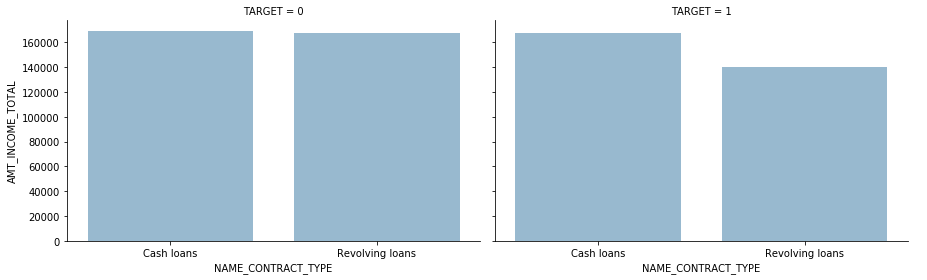

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#契約タイプ別
grid = sns.FacetGrid(train_df, col="TARGET", height=4, aspect=1.6)
grid.map(sns.barplot, 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', order=["Cash loans", "Revolving loans"], alpha=.5, ci=None)
grid.add_legend();

「返済難あり」の「Revolving loans」の給与水準が若干低い。
収入の低さとリボ払いはイメージに合う。

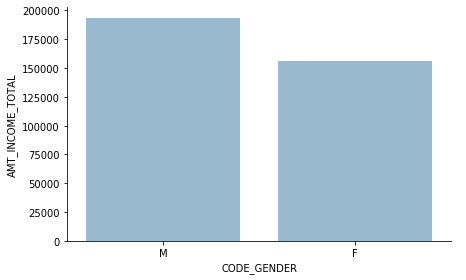

In [16]:
#男女別（全体）
grid = sns.FacetGrid(train_df, height=4, aspect=1.6)
grid.map(sns.barplot, 'CODE_GENDER', 'AMT_INCOME_TOTAL', order=["M", "F"], alpha=.5, ci=None)
grid.add_legend();

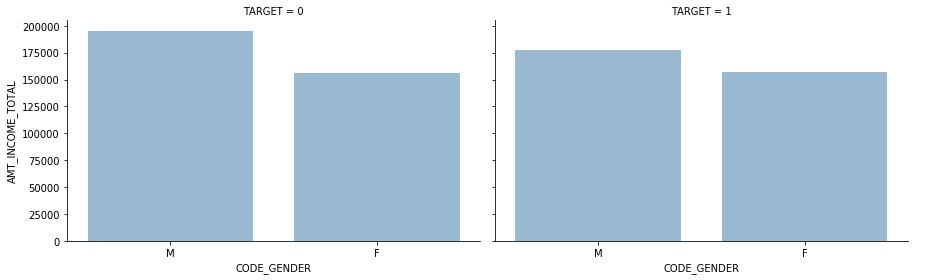

In [17]:
#男女別（TARGET別）
grid = sns.FacetGrid(train_df, col="TARGET", height=4, aspect=1.6)
grid.map(sns.barplot, 'CODE_GENDER', 'AMT_INCOME_TOTAL',order=["M", "F"], alpha=.5, ci=None)
grid.add_legend();

男女別ではあまり収入に関しては際立った特徴はなさそう。少しだけ「返済に難あり」の方が少ない。

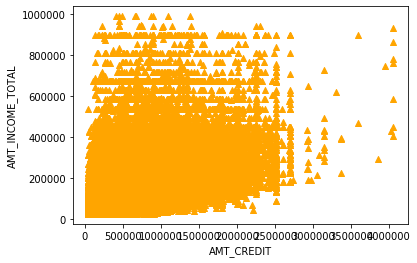

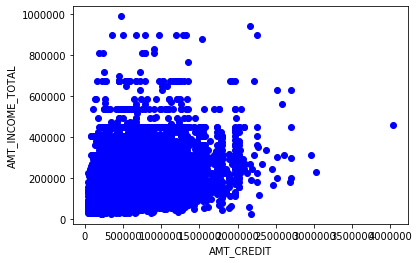

In [25]:
re_train_df = train_df[train_df["AMT_INCOME_TOTAL"] < 1000000]
fig, ax = plt.subplots(figsize=(6, 4))

plt.scatter(re_train_df["AMT_CREDIT"][re_train_df["TARGET"]==0], 
                    re_train_df["AMT_INCOME_TOTAL"][re_train_df["TARGET"]==0],
                    marker="^", color="orange");
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_INCOME_TOTAL")
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(re_train_df["AMT_CREDIT"][re_train_df["TARGET"]==1], 
                    re_train_df["AMT_INCOME_TOTAL"][re_train_df["TARGET"]==1],
                    marker="o", color="b")
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_INCOME_TOTAL")
plt.show()



Text(0.5, 1.03, 'TARGET 1')

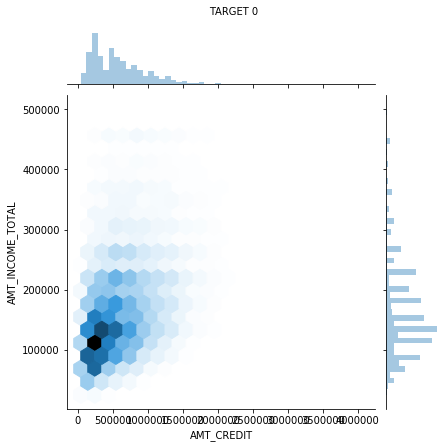

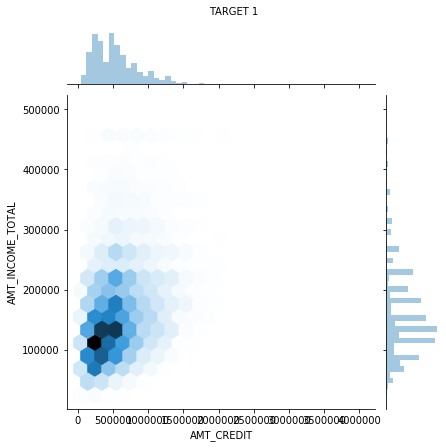

In [31]:
re_train_df = train_df[train_df["AMT_INCOME_TOTAL"] < 500000]
re_train_df0 = re_train_df[re_train_df["TARGET"]==0]
hexbin = sns.jointplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', data=re_train_df0, kind="hex", gridsize=20)
hexbin.set_axis_labels(xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL')
hexbin.fig.suptitle('TARGET 0', fontsize=10, y=1.03)

re_train_df0 = re_train_df[re_train_df["TARGET"]==1]
hexbin = sns.jointplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', data=re_train_df0, kind="hex", gridsize=20)
hexbin.set_axis_labels(xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL')
hexbin.fig.suptitle('TARGET 1', fontsize=10, y=1.03)

In [34]:
C_mean_0 = re_train_df["AMT_CREDIT"][re_train_df["TARGET"]==0].mean()
I_mean_0 = re_train_df["AMT_INCOME_TOTAL"][re_train_df["TARGET"]==0].mean()
print("ローン額と収入の割合の平均（TARGET=0（　　　問題なし　　　））：　%.2f" % (C_mean_0 / I_mean_0))

C_mean_1 = re_train_df["AMT_CREDIT"][re_train_df["TARGET"]==1].mean()
I_mean_1 = re_train_df["AMT_INCOME_TOTAL"][re_train_df["TARGET"]==1].mean()
print("ローン額と収入の割合の平均（TARGET=1（返済に難あり））：　%.2f" % (C_mean_1 / I_mean_1))

ローン額と収入の割合の平均（TARGET=0（　　　問題なし　　　））：　3.65
ローン額と収入の割合の平均（TARGET=1（返済に難あり））：　3.52


<br>「返済に難あり」の人が必ずしも無理な金額を借りているようには見受けられない
<br>返済期間が短く、年単位の返済額が大きい？↓

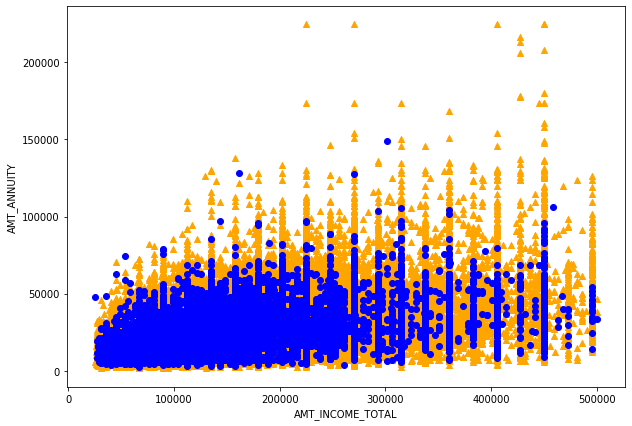

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.scatter(re_train_df["AMT_INCOME_TOTAL"][re_train_df["TARGET"]==0], 
                    re_train_df["AMT_ANNUITY"][re_train_df["TARGET"]==0],
                    marker="^", color="orange");

plt.scatter(re_train_df["AMT_INCOME_TOTAL"][re_train_df["TARGET"]==1], 
                    re_train_df["AMT_ANNUITY"][re_train_df["TARGET"]==1],
                    marker="o", color="b")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_ANNUITY")
plt.show()



<br>年間の返済額は関係なさそう。むしろ年間の返済額が低い方がデフォルト率が高い
<br>給料の他に年間支払いを低く設定しなければいけない要因あり？

In [36]:
target_summary_split("AMT_INCOME_TOTAL", "IncomeBand", "TARGET", 5)

'IncomeBand'

,IncomeBand,TARGET rate,TARGET cnt,TARGET total
0,"(25649.999, 99000.0]",0.082062,63671,5225
1,"(99000.0, 135000.0]",0.085883,85756,7365
2,"(135000.0, 162000.0]",0.086847,35453,3079
3,"(162000.0, 225000.0]",0.080569,75513,6084
4,"(225000.0, 117000000.0]",0.065198,47118,3072


そもそも収入額レンジでのデフォルト率にあまり違いはない。
一番高額のレンジに関してはデフォルト率低め。

### 年齢との関連

In [37]:
train_df["Age"] = round(train_df["DAYS_BIRTH"] / -365, 0)

In [38]:
target_summary_split("Age", "AgeBand", "TARGET", 5)

'AgeBand'

,AgeBand,TARGET rate,TARGET cnt,TARGET total
0,"(20.999, 32.0]",0.111912,65203,7297
1,"(32.0, 39.0]",0.093077,57834,5383
2,"(39.0, 47.0]",0.078278,63722,4988
3,"(47.0, 56.0]",0.066935,61956,4147
4,"(56.0, 69.0]",0.051194,58796,3010


若い世代の方が返済に難がある傾向。
年齢が高くなるにつれ綺麗に割合が下がっている。

### 所有物情報との関連

In [39]:
pocession = ["OWN_CAR_AGE",
             "FLAG_MOBIL",          "FLAG_EMP_PHONE",
             "FLAG_WORK_PHONE",
             "FLAG_CONT_MOBILE",
             "FLAG_PHONE",
             "FLAG_EMAIL",
             "OCCUPATION_TYPE",
             "CNT_FAM_MEMBERS"]

In [40]:
for feature in pocession:
    target_summary_nonsplit(feature, "TARGET")

'OWN_CAR_AGE'

,OWN_CAR_AGE,TARGET rate,TARGET cnt,TARGET total
0,0.0,0.068885,2134,147
1,1.0,0.063636,5280,336
2,2.0,0.059979,5852,351
3,3.0,0.049922,6370,318
4,4.0,0.053986,5557,300
5,5.0,0.051739,3595,186
6,6.0,0.055782,6382,356
7,7.0,0.058324,7424,433
8,8.0,0.063020,5887,371
9,9.0,0.070518,5020,354


'FLAG_MOBIL'

,FLAG_MOBIL,TARGET rate,TARGET cnt,TARGET total
0,0,0.000000,1,0
1,1,0.080729,307510,24825


'FLAG_EMP_PHONE'

,FLAG_EMP_PHONE,TARGET rate,TARGET cnt,TARGET total
0,0,0.054003,55386,2991
1,1,0.086600,252125,21834


'FLAG_WORK_PHONE'

,FLAG_WORK_PHONE,TARGET rate,TARGET cnt,TARGET total
0,0,0.076851,246203,18921
1,1,0.096301,61308,5904


'FLAG_CONT_MOBILE'

,FLAG_CONT_MOBILE,TARGET rate,TARGET cnt,TARGET total
0,0,0.078397,574,45
1,1,0.080733,306937,24780


'FLAG_PHONE'

,FLAG_PHONE,TARGET rate,TARGET cnt,TARGET total
0,0,0.084784,221080,18744
1,1,0.070357,86431,6081


'FLAG_EMAIL'

,FLAG_EMAIL,TARGET rate,TARGET cnt,TARGET total
0,0,0.080846,290069,23451
1,1,0.078775,17442,1374


'OCCUPATION_TYPE'

,OCCUPATION_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Accountants,0.048303,9813,474
1,Cleaning staff,0.096067,4653,447
2,Cooking staff,0.104440,5946,621
3,Core staff,0.063040,27570,1738
4,Drivers,0.113261,18603,2107
5,HR staff,0.063943,563,36
6,High skill tech staff,0.061599,11380,701
7,IT staff,0.064639,526,34
8,Laborers,0.105788,55186,5838
9,Low-skill Laborers,0.171524,2093,359


'CNT_FAM_MEMBERS'

,CNT_FAM_MEMBERS,TARGET rate,TARGET cnt,TARGET total
0,1.0,0.083644,67847,5675
1,2.0,0.075835,158357,12009
2,3.0,0.087603,52601,4608
3,4.0,0.086488,24697,2136
4,5.0,0.094020,3478,327
5,6.0,0.134804,408,55
6,7.0,0.074074,81,6
7,8.0,0.300000,20,6
8,9.0,0.000000,6,0
9,10.0,0.333333,3,1


<br>OWN_CAR_AGE > 年次が高くなるにつれデフォルト率が高い
<br>FLAG_MOBIL　＞　ほぼ全員持っている
<br>FLAG_EMP_PHONE　＞　仕事電話持ってる方がデフォルトが高い
<br>FLAG_WORK_PHONE　＞　家電持ってる方がデフォルトが高い
<br>CNT_FAM_MEMBERS ＞　ファミリーメンバーが多い方がデフォルト高い。ただ２人は少なくなっているので結婚したら下がり、子供が生まれたら高くなるということ？

### 住居の周辺情報との関連

In [41]:
around = ["REGION_RATING_CLIENT",
          "REGION_RATING_CLIENT_W_CITY",
          "WEEKDAY_APPR_PROCESS_START",
          "HOUR_APPR_PROCESS_START",
          "REG_REGION_NOT_LIVE_REGION",
          "REG_REGION_NOT_WORK_REGION",
          "LIVE_REGION_NOT_WORK_REGION",
          "REG_CITY_NOT_LIVE_CITY",
          "REG_CITY_NOT_WORK_CITY",
          "LIVE_CITY_NOT_WORK_CITY",
          "ORGANIZATION_TYPE"]

In [42]:
for feature in around:
    target_summary_nonsplit(feature, "TARGET")

'REGION_RATING_CLIENT'

,REGION_RATING_CLIENT,TARGET rate,TARGET cnt,TARGET total
0,1,0.048203,32197,1552
1,2,0.078891,226984,17907
2,3,0.111028,48330,5366


'REGION_RATING_CLIENT_W_CITY'

,REGION_RATING_CLIENT_W_CITY,TARGET rate,TARGET cnt,TARGET total
0,1,0.048409,34167,1654
1,2,0.079178,229484,18170
2,3,0.114022,43860,5001


'WEEKDAY_APPR_PROCESS_START'

,WEEKDAY_APPR_PROCESS_START,TARGET rate,TARGET cnt,TARGET total
0,FRIDAY,0.081469,50338,4101
1,MONDAY,0.077572,50714,3934
2,SATURDAY,0.078873,33852,2670
3,SUNDAY,0.079291,16181,1283
4,THURSDAY,0.081003,50591,4098
5,TUESDAY,0.083505,53901,4501
6,WEDNESDAY,0.081604,51934,4238


'HOUR_APPR_PROCESS_START'

,HOUR_APPR_PROCESS_START,TARGET rate,TARGET cnt,TARGET total
0,0,0.150000,40,6
1,1,0.081395,86,7
2,2,0.098361,305,30
3,3,0.086992,1230,107
4,4,0.082775,2090,173
5,5,0.105827,3638,385
6,6,0.110407,5842,645
7,7,0.100427,9131,917
8,8,0.090765,15127,1373
9,9,0.082055,27384,2247


'REG_REGION_NOT_LIVE_REGION'

,REG_REGION_NOT_LIVE_REGION,TARGET rate,TARGET cnt,TARGET total
0,0,0.080540,302854,24392
1,1,0.092978,4657,433


'REG_REGION_NOT_WORK_REGION'

,REG_REGION_NOT_WORK_REGION,TARGET rate,TARGET cnt,TARGET total
0,0,0.080291,291899,23437
1,1,0.088906,15612,1388


'LIVE_REGION_NOT_WORK_REGION'

,LIVE_REGION_NOT_WORK_REGION,TARGET rate,TARGET cnt,TARGET total
0,0,0.080571,295008,23769
1,1,0.084460,12503,1056


'REG_CITY_NOT_LIVE_CITY'

,REG_CITY_NOT_LIVE_CITY,TARGET rate,TARGET cnt,TARGET total
0,0,0.077207,283472,21886
1,1,0.122260,24039,2939


'REG_CITY_NOT_WORK_CITY'

,REG_CITY_NOT_WORK_CITY,TARGET rate,TARGET cnt,TARGET total
0,0,0.073127,236644,17305
1,1,0.106114,70867,7520


'LIVE_CITY_NOT_WORK_CITY'

,LIVE_CITY_NOT_WORK_CITY,TARGET rate,TARGET cnt,TARGET total
0,0,0.076585,252296,19322
1,1,0.099665,55215,5503


'ORGANIZATION_TYPE'

,ORGANIZATION_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Advertising,0.081585,429,35
1,Agriculture,0.104727,2454,257
2,Bank,0.051855,2507,130
3,Business Entity Type 1,0.081384,5984,487
4,Business Entity Type 2,0.085284,10553,900
5,Business Entity Type 3,0.092996,67992,6323
6,Cleaning,0.111538,260,29
7,Construction,0.116798,6721,785
8,Culture,0.055409,379,21
9,Electricity,0.066316,950,63


<br>REGION_RATING_CLIENT　＞　わかりやすくレートによって差が出ている。
<br>REGION_RATING_CLIENT_W_CITY　＞　上と同様
<br>WEEKDAY_APPR_PROCESS_START　＞　土日の数が少ない。休みだから？
<br>HOUR_APPR_PROCESS_START　＞　早朝と深夜に割合高い
<br>REG_REGION_NOT_LIVE_REGION　＞　一致しない（１）場合デフォルトが高い
<br>REG_REGION_NOT_WORK_REGION　＞一致しない（１）場合デフォルトが高い
<br>LIVE_REGION_NOT_WORK_REGION　＞一致しない（１）場合デフォルトが高い
<br>REG_CITY_NOT_LIVE_CITY　＞一致しない（１）場合デフォルトが高い
<br>REG_CITY_NOT_WORK_CITY　＞一致しない（１）場合デフォルトが高い
<br>LIVE_CITY_NOT_WORK_CITY　＞一致しない（１）場合デフォルトが高い

### 住居情報

In [43]:
residence = ["APARTMENTS_AVG",
             "BASEMENTAREA_AVG",
             "YEARS_BEGINEXPLUATATION_AVG",
             "YEARS_BUILD_AVG",
             "COMMONAREA_AVG",
             "ENTRANCES_AVG",
             "LANDAREA_AVG",
             "LIVINGAPARTMENTS_AVG",
             "LIVINGAREA_AVG"]

In [44]:
for feature in residence:
    name = feature+"Band"
    target_summary_split(feature, name, "TARGET", 5)

'APARTMENTS_AVGBand'

,APARTMENTS_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.0412]",0.087239,30319,2645
1,"(0.0412, 0.0742]",0.069168,30751,2127
2,"(0.0742, 0.104]",0.068251,30051,2051
3,"(0.104, 0.166]",0.065296,30048,1962
4,"(0.166, 1.0]",0.057957,30281,1755


'BASEMENTAREA_AVGBand'

,BASEMENTAREA_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.0343]",0.077574,25524,1980
1,"(0.0343, 0.0637]",0.071077,25564,1817
2,"(0.0637, 0.0859]",0.070649,25478,1800
3,"(0.0859, 0.124]",0.066403,25526,1695
4,"(0.124, 1.0]",0.058683,25476,1495


'YEARS_BEGINEXPLUATATION_AVGBand'

,YEARS_BEGINEXPLUATATION_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.975]",0.080462,31692,2550
1,"(0.975, 0.98]",0.072320,35163,2543
2,"(0.98, 0.984]",0.070171,31238,2192
3,"(0.984, 0.988]",0.067471,28679,1935
4,"(0.988, 1.0]",0.058473,30732,1797


'YEARS_BUILD_AVGBand'

,YEARS_BUILD_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.674]",0.077532,22249,1725
1,"(0.674, 0.728]",0.068950,19478,1343
2,"(0.728, 0.782]",0.070331,21143,1487
3,"(0.782, 0.83]",0.067665,19567,1324
4,"(0.83, 1.0]",0.058049,20586,1195


'COMMONAREA_AVGBand'

,COMMONAREA_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.0057]",0.075588,18614,1407
1,"(0.0057, 0.0142]",0.072761,18595,1353
2,"(0.0142, 0.0306]",0.069282,18403,1275
3,"(0.0306, 0.0625]",0.067887,18516,1257
4,"(0.0625, 1.0]",0.059942,18518,1110


'ENTRANCES_AVGBand'

,ENTRANCES_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.069]",0.079792,39841,3179
1,"(0.069, 0.103]",0.071441,22172,1584
2,"(0.103, 0.138]",0.067272,36672,2467
3,"(0.138, 0.207]",0.062929,31607,1989
4,"(0.207, 1.0]",0.062302,22391,1395


'LANDAREA_AVGBand'

,LANDAREA_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.0138]",0.071494,24995,1787
1,"(0.0138, 0.0358]",0.075754,25002,1894
2,"(0.0358, 0.0608]",0.071557,25029,1791
3,"(0.0608, 0.0979]",0.067512,24914,1682
4,"(0.0979, 1.0]",0.062728,24981,1567


'LIVINGAPARTMENTS_AVGBand'

,LIVINGAPARTMENTS_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.0429]",0.083448,19569,1633
1,"(0.0429, 0.0639]",0.070185,19363,1359
2,"(0.0639, 0.0899]",0.067204,19597,1317
3,"(0.0899, 0.144]",0.065255,19508,1273
4,"(0.144, 1.0]",0.058158,19275,1121


'LIVINGAREA_AVGBand'

,LIVINGAREA_AVGBand,TARGET rate,TARGET cnt,TARGET total
0,"(-0.001, 0.0356]",0.087519,30679,2685
1,"(0.0356, 0.0632]",0.073833,30718,2268
2,"(0.0632, 0.0891]",0.068155,30548,2082
3,"(0.0891, 0.154]",0.064313,30616,1969
4,"(0.154, 1.0]",0.055882,30600,1710


<br>いずれの場合も平均値が高くなるにつれデフォルト率が低くなっている

### その他

In [45]:
social_circle = ["OBS_30_CNT_SOCIAL_CIRCLE", 
                 "DEF_30_CNT_SOCIAL_CIRCLE",
                 "OBS_60_CNT_SOCIAL_CIRCLE",
                 "DEF_60_CNT_SOCIAL_CIRCLE"]

In [46]:
for feature in social_circle:
    target_summary_nonsplit(feature, "TARGET")

'OBS_30_CNT_SOCIAL_CIRCLE'

,OBS_30_CNT_SOCIAL_CIRCLE,TARGET rate,TARGET cnt,TARGET total
0,0.0,0.079007,163910,12950
1,1.0,0.079843,48783,3895
2,2.0,0.082461,29808,2458
3,3.0,0.082423,20322,1675
4,4.0,0.088242,14143,1248
5,5.0,0.083429,9553,797
6,6.0,0.087556,6453,565
7,7.0,0.093622,4390,411
8,8.0,0.082912,2967,246
9,9.0,0.084873,2003,170


'DEF_30_CNT_SOCIAL_CIRCLE'

,DEF_30_CNT_SOCIAL_CIRCLE,TARGET rate,TARGET cnt,TARGET total
0,0.0,0.077759,271324,21098
1,1.0,0.101454,28328,2874
2,2.0,0.116476,5323,620
3,3.0,0.128356,1192,153
4,4.0,0.138340,253,35
5,5.0,0.142857,56,8
6,6.0,0.090909,11,1
7,7.0,0.000000,1,0
8,8.0,0.000000,1,0
9,34.0,0.000000,1,0


'OBS_60_CNT_SOCIAL_CIRCLE'

,OBS_60_CNT_SOCIAL_CIRCLE,TARGET rate,TARGET cnt,TARGET total
0,0.0,0.079075,164666,13021
1,1.0,0.079681,48870,3894
2,2.0,0.082241,29766,2448
3,3.0,0.082612,20215,1670
4,4.0,0.088341,13946,1232
5,5.0,0.084328,9463,798
6,6.0,0.088990,6349,565
7,7.0,0.090009,4344,391
8,8.0,0.083160,2886,240
9,9.0,0.086269,1959,169


'DEF_60_CNT_SOCIAL_CIRCLE'

,DEF_60_CNT_SOCIAL_CIRCLE,TARGET rate,TARGET cnt,TARGET total
0,0.0,0.078348,280721,21994
1,1.0,0.105169,21841,2297
2,2.0,0.121451,3170,385
3,3.0,0.158863,598,95
4,4.0,0.111111,135,15
5,5.0,0.150000,20,3
6,6.0,0.000000,3,0
7,7.0,0.000000,1,0
8,24.0,0.000000,1,0


<br>回数増加につれデフォルト率が高くなっている印象

## Categoricalデータ分析

### 各特徴量のラベル別デフォルト割合

In [47]:
train_df.describe(include='object').T.index

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [48]:
categorical_feature = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [49]:
for feature in categorical_feature:
    target_summary_nonsplit(feature, "TARGET")

'NAME_CONTRACT_TYPE'

,NAME_CONTRACT_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Cash loans,0.083459,278232,23221
1,Revolving loans,0.054783,29279,1604


'CODE_GENDER'

,CODE_GENDER,TARGET rate,TARGET cnt,TARGET total
0,F,0.069993,202448,14170
1,M,0.101419,105059,10655
2,XNA,0.000000,4,0


'FLAG_OWN_CAR'

,FLAG_OWN_CAR,TARGET rate,TARGET cnt,TARGET total
0,N,0.085002,202924,17249
1,Y,0.072437,104587,7576


'FLAG_OWN_REALTY'

,FLAG_OWN_REALTY,TARGET rate,TARGET cnt,TARGET total
0,N,0.083249,94199,7842
1,Y,0.079616,213312,16983


'NAME_TYPE_SUITE'

,NAME_TYPE_SUITE,TARGET rate,TARGET cnt,TARGET total
0,Children,0.073768,3267,241
1,Family,0.074946,40149,3009
2,Group of people,0.084871,271,23
3,Other_A,0.087760,866,76
4,Other_B,0.098305,1770,174
5,"Spouse, partner",0.078716,11370,895
6,Unaccompanied,0.081830,248526,20337


'NAME_INCOME_TYPE'

,NAME_INCOME_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Businessman,0.000000,10,0
1,Commercial associate,0.074843,71617,5360
2,Maternity leave,0.400000,5,2
3,Pensioner,0.053864,55362,2982
4,State servant,0.057550,21703,1249
5,Student,0.000000,18,0
6,Unemployed,0.363636,22,8
7,Working,0.095885,158774,15224


'NAME_EDUCATION_TYPE'

,NAME_EDUCATION_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Academic degree,0.018293,164,3
1,Higher education,0.053551,74863,4009
2,Incomplete higher,0.084850,10277,872
3,Lower secondary,0.109277,3816,417
4,Secondary / secondary special,0.089399,218391,19524


'NAME_FAMILY_STATUS'

,NAME_FAMILY_STATUS,TARGET rate,TARGET cnt,TARGET total
0,Civil marriage,0.099446,29775,2961
1,Married,0.075599,196432,14850
2,Separated,0.081942,19770,1620
3,Single / not married,0.098077,45444,4457
4,Unknown,0.000000,2,0
5,Widow,0.058242,16088,937


'NAME_HOUSING_TYPE'

,NAME_HOUSING_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Co-op apartment,0.079323,1122,89
1,House / apartment,0.077957,272868,21272
2,Municipal apartment,0.085397,11183,955
3,Office apartment,0.065724,2617,172
4,Rented apartment,0.123131,4881,601
5,With parents,0.116981,14840,1736


'OCCUPATION_TYPE'

,OCCUPATION_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Accountants,0.048303,9813,474
1,Cleaning staff,0.096067,4653,447
2,Cooking staff,0.104440,5946,621
3,Core staff,0.063040,27570,1738
4,Drivers,0.113261,18603,2107
5,HR staff,0.063943,563,36
6,High skill tech staff,0.061599,11380,701
7,IT staff,0.064639,526,34
8,Laborers,0.105788,55186,5838
9,Low-skill Laborers,0.171524,2093,359


'WEEKDAY_APPR_PROCESS_START'

,WEEKDAY_APPR_PROCESS_START,TARGET rate,TARGET cnt,TARGET total
0,FRIDAY,0.081469,50338,4101
1,MONDAY,0.077572,50714,3934
2,SATURDAY,0.078873,33852,2670
3,SUNDAY,0.079291,16181,1283
4,THURSDAY,0.081003,50591,4098
5,TUESDAY,0.083505,53901,4501
6,WEDNESDAY,0.081604,51934,4238


'ORGANIZATION_TYPE'

,ORGANIZATION_TYPE,TARGET rate,TARGET cnt,TARGET total
0,Advertising,0.081585,429,35
1,Agriculture,0.104727,2454,257
2,Bank,0.051855,2507,130
3,Business Entity Type 1,0.081384,5984,487
4,Business Entity Type 2,0.085284,10553,900
5,Business Entity Type 3,0.092996,67992,6323
6,Cleaning,0.111538,260,29
7,Construction,0.116798,6721,785
8,Culture,0.055409,379,21
9,Electricity,0.066316,950,63


'FONDKAPREMONT_MODE'

,FONDKAPREMONT_MODE,TARGET rate,TARGET cnt,TARGET total
0,not specified,0.075435,5687,429
1,org spec account,0.058195,5619,327
2,reg oper account,0.069782,73830,5152
3,reg oper spec account,0.065563,12080,792


'HOUSETYPE_MODE'

,HOUSETYPE_MODE,TARGET rate,TARGET cnt,TARGET total
0,block of flats,0.069434,150503,10450
1,specific housing,0.101401,1499,152
2,terraced house,0.084983,1212,103


'WALLSMATERIAL_MODE'

,WALLSMATERIAL_MODE,TARGET rate,TARGET cnt,TARGET total
0,Block,0.070247,9253,650
1,Mixed,0.075348,2296,173
2,Monolithic,0.047218,1779,84
3,Others,0.083077,1625,135
4,Panel,0.063477,66040,4192
5,"Stone, brick",0.074057,64815,4800
6,Wooden,0.096979,5362,520


'EMERGENCYSTATE_MODE'

,EMERGENCYSTATE_MODE,TARGET rate,TARGET cnt,TARGET total
0,No,0.069649,159428,11104
1,Yes,0.095790,2328,223


<br>NAME_CONTRACT_TYPE　＞　Cash loansの方がデフォルト率が高い。
<br>CODE_GENDER ＞　男性の方がデフォルト率が高い
<br>FLAG_OWN_CAR　＞　車を未所有の方がデフォルト率が若干高い
<br>NAME_TYPE_SUITE ＞　家族、子供と同行した人の方がデフォルト率は低い
<br>NAME_INCOME_TYPE ＞　Maternity leave、Unemployedはかなりデフォルト率が高いが母体が少ない
<br>NAME_EDUCATION_TYPE　＞　大卒、修士卒のデフォルト率はかなり低い
<br>NAME_FAMILY_STATUS ＞　Single / not marriedのデフォルト率が高い、またCivil marriageのデフォルト率も高いがいまいちピンとこない。
<br>NAME_HOUSING_TYPE　＞　賃貸アパートおよび親と同居している人はデフォルト率が高い
<br>OCCUPATION_TYPE　＞　Low-skill Laborersが最もデフォルト率が高く、Accountantsが最も低い
<br>WEEKDAY_APPR_PROCESS_START　＞　土日の数が少ないのは休日の関係？
<br>ORGANIZATION_TYPE ＞　オフィス勤務よりも現場勤務の方がデフォルト率が高い印象
